# Tâche 8 : Bande de valence/conduction

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter

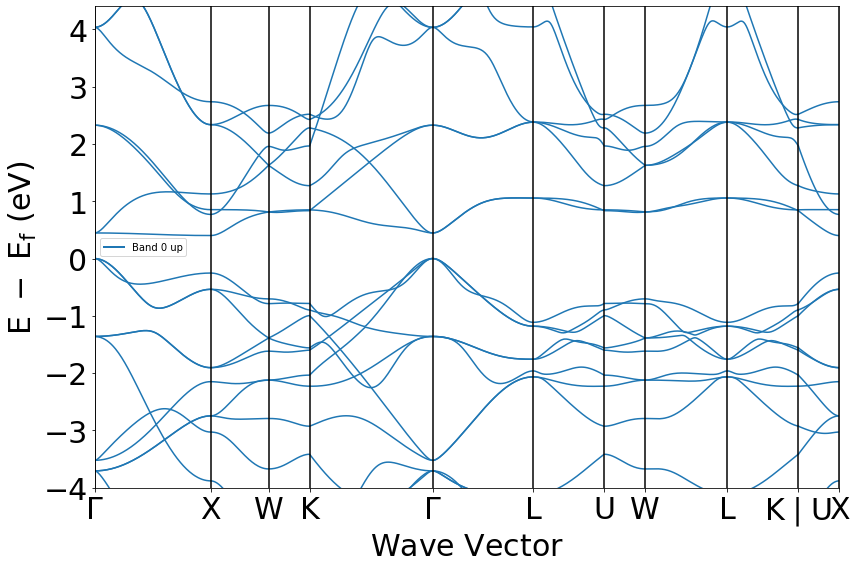

In [14]:
#On accède à la "band structure" avec la fct get_bandstructure_by_material_id()
with MPRester('G076mkTglycC4EiF') as m:
    id = 'mp-866141'
    b_s = m.get_bandstructure_by_material_id(id)  
#On plot le graphe à analyser    
    plotter = BSPlotter(b_s)
    plotter.get_plot()

On observe bien ci-dessus qu'il y a une bande interdite et des extrema encadrant cette bande.

# La bande interdite

La bande interdite est directe? : False
L'énergie de la bande interdite vaut 0.4015999999999984eV
Le vecteur de transition est : \Gamma-(0.495,0.000,0.495) et donc le vecteur Γ-X
La bande interdite est entre ymin = 0.0 et ymax = 0.4015999999999984


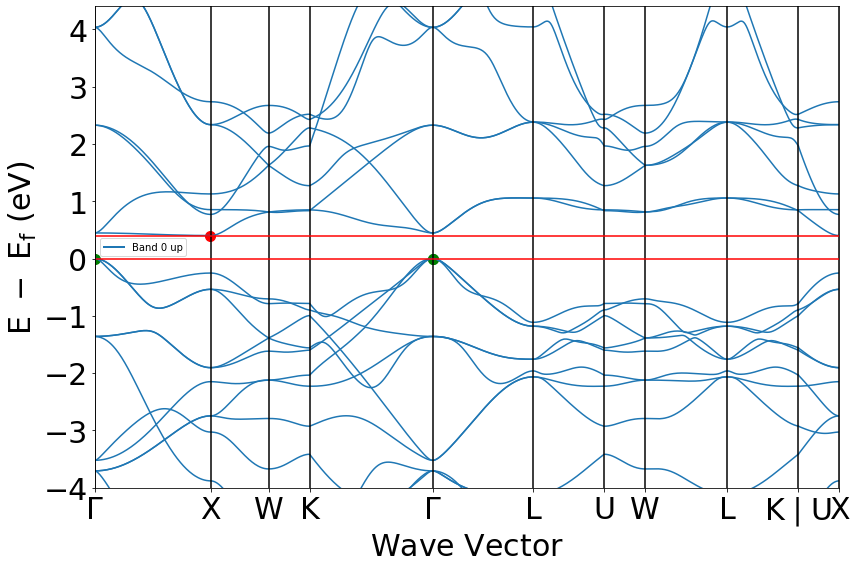

In [51]:
# Avec http://matgenb.materialsvirtuallab.org/2017/09/03/Analyze-and-plot-band-structures.html on peut plot la bande interdite.

plotter.get_plot(vbm_cbm_marker=True)
Y = plotter.bs_plot_data()
dist = plotter.get_ticks()["distance"]
x = np.linspace(0,dist[-1],100)
ymin = Y['vbm'][0][1]
ymax = Y['cbm'][0][1]
y1 = np.ones(100)*ymin
y2 = np.ones(100)*ymax
#plot
plt.plot(x,y1,"-r")
plt.plot(x,y2,"-r")

arr = b_s.get_band_gap()
print("La bande interdite est directe? : " + str(arr['direct']))
print("L'énergie de la bande interdite vaut " + str(arr['energy']) + "eV")
print("Le vecteur de transition est : " + str(arr['transition']) + " et donc le vecteur Γ-X")
print("La bande interdite est entre ymin = "+str(ymin) + " et ymax = " + str(ymax))

# La dispersion 

Pour évaluer la dispersion, on cherche l'énergie du minimum de la bande de conduction et du maximum de la bande de valence.
Une fois cela fait, il faut comparer les différentes pentes. Si la pente est maximale, la dispersion l'est aussi, si elle est minimale, il en est de même pour la dispersion.

In [63]:
#La première bande de conduction
#on cherche l'énergie du minimum de la bande de conduction (point rouge)
Emin = b_s.get_cbm()['energy']
print("L'énergie du minimum de la bande de conduction vaut Emin = " + str(Emin) + "eV") #correspond au point en rouge sur le graphe ci-avant
print("La position de ce point est : X," + str(ymax))
#les bandes contenant le min de la bande de conduction
print("Bandes contenant le min de la bande de conduction :" ,b_s.get_cbm()['band_index'])

L'énergie du minimum de la bande de conduction vaut Emin = 8.7eV
La position de ce point est : X,0.4015999999999984
Bandes contenant le min de la bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [21]})


In [64]:
#La dernière bande de valence
#on cherche l'énergie du maximum de la bande de valence (point vert)
Emax = b_s.get_vbm()['energy']
print("L'énergie du maximum de la bande de valence vaut Emax = " + str(Emax) + "eV")
print("La position de ce point est : Γ," + str(ymin))
#les bandes contenant le max de la bande de valence
print("Bandes contenant le max de la bande de valence :" , b_s.get_vbm()['band_index'])

L'énergie du maximum de la bande de valence vaut Emax = 8.2984eV
La position de ce point est : Γ,0.0
Bandes contenant le max de la bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [18, 19, 20]})


In [65]:
#on cherche les bandes contenant le min/max des différentes bandes (en energie)
print("Les bandes contenant le max de la bande de valence et le min de la bande de conduction sont respectivement les bandes 20 et 21")

Les bandes contenant le max de la bande de valence et le min de la bande de conduction sont respectivement les bandes 20 et 21


In [78]:
#analyse des dispersions
x = np.array([dist[0], dist[1], dist[3], dist[5], dist[7], dist[9], dist[11], dist[13], dist[15], dist[17], dist[18]])
y = plotter.bs_plot_data()["energy"]
a = len(x)-1
arrv = np.zeros(a) #tableau contenant les pentes pour valence
arrc = np.zeros(a) #tableau contenant les pentes pour conduction
dx  = np.zeros(a)
dyc = np.zeros(a)
dyv = np.zeros(a)

for i in range(a):
    dx[i] = x[i+1] - x[i]
    dyv[i] =y.get('1')[i][20][-1] - y.get('1')[i][20][0] #valence
    dyc[i] =y.get('1')[i][21][-1] - y.get('1')[i][21][0] #conduction
    arrc[i] = dyc[i]/dx[i]
    arrv[i] = dyv[i]/dx[i] 

print(arrc)
print(arrv)
print("Dispersion max de la bande de valence    = " + str(np.max(abs(arrv))) +" eV")
print("Dispersion min de la bande de valence    = " + str(np.min(abs(arrv))) +"eV")
print("Dispersion max de la bande de conduction = " + str(np.max(abs(arrc))) +" eV")
print("Dispersion min de la bande de conduction = " + str(np.min(abs(arrc))) +" eV")

[-0.04121951  0.74485014  0.05893378 -0.33190819  0.63820739 -0.32767969
 -0.05893378  0.31324583 -0.32767969 -1.11231095]
[-0.229108   -0.81696164 -0.20575575  0.66970975 -1.16438066  0.4867116
  0.20575575 -0.52438248  0.4867116   1.36111397]
Dispersion max de la bande de valence    = 1.3611139716651244 eV
Dispersion min de la bande de valence    = 0.20575574534019125eV
Dispersion max de la bande de conduction = 1.1123109471005863 eV
Dispersion min de la bande de conduction = 0.0412195103817906 eV


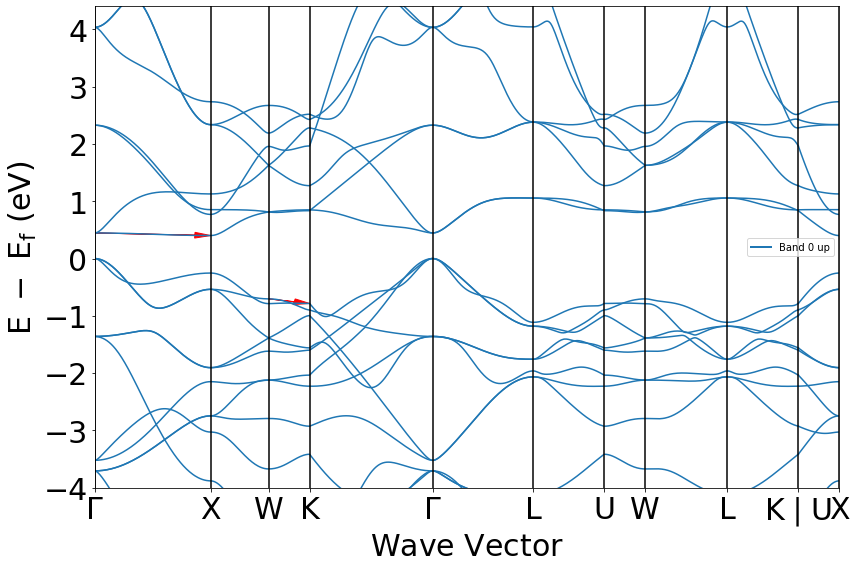

In [85]:
plotter.get_plot()
plt.arrow(x[-1], (y.get('1')[-1][20])[0], dx[-1], dyv[-1], color = 'r', head_width = 0.1,length_includes_head=True)#max arrv
plt.arrow(x[2], (y.get('1')[2][20])[0]  , dx[2] , dyv[2] , color = 'r', head_width = 0.1,length_includes_head=True)#min arrv
plt.arrow(x[-1], (y.get('1')[-1][21])[0], dx[-1], dyc[-1], color = 'r', head_width = 0.1,length_includes_head=True)#max arrc
plt.arrow(x[0], (y.get('1')[0][21])[0]  , dx[0] , dyc[0] , color = 'r', head_width = 0.1,length_includes_head=True)#min arrc

plt.show()

# Masse effective

La masse effective est définie comme :
$m^* = \frac{\hbar^2 k^2}{2E(k)}$ 

In [ ]:
h = 6.62607015e-34 #J
hbar = h/(2*np.pi)#eV

#on cherche les masses effectives au sommet de la dernière bande de valence et à la base de la première bande de conduction
